# O Teste Bechdel: Avaliando a Representação Feminina na Ficção

Como um grande fã de filmes e programas de TV, fiquei intrigado quando aprendi sobre o Teste Bechdel. 
Esse teste mede a representação das mulheres na ficção, verificando três critérios fundamentais:

1. O filme deve ter pelo menos duas personagens femininas com nomes.
2. Essas personagens devem interagir entre si em alguma cena.
3. A conversa entre elas não pode ser sobre homens.

O Teste Bechdel foi criado por Alison Bechdel em 1985 e, mesmo nos dias de hoje, continua sendo uma medida relevante. Inicialmente, eu esperava que fosse um teste simples que todos os filmes deveriam passar, mas será que essa é a realidade?

Antes de conhecer o Teste Bechdel, eu costumava considerar métricas como a presença de diretoras mulheres ou a porcentagem de mulheres no elenco, como indicadores de representação feminina nos filmes. No entanto, essas métricas estão relacionadas à representação fora das telas. O Teste Bechdel, por outro lado, nos fornece um guia para a representação feminina na tela, algo bastante complexo de quantificar.

Portanto, com o objetivo de investigar mais a fundo esse tema e conectar as métricas relacionadas à tela e fora dela, obtive os dados do Teste Bechdel de mais de 9.300 filmes em um site incrível chamado [Bechdel Test Movie List](https://bechdeltest.com/). Com base nesses dados, procuro responder às seguintes perguntas:

1. Como os resultados do Teste Bechdel têm evoluído ao longo do tempo? Os filmes estão melhorando em passar no Teste Bechdel?
2. Como o Teste Bechdel se compara a outros padrões de representação fora das telas?


## Importando pacotes e dados

In [77]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import plotnine as pn
from mizani.formatters import percent_format
from ydata_profiling import ProfileReport

In [78]:
# Importar os dados
bechdel_detailed_df = pd.read_csv("Bechdel_detailed.csv", index_col=0)

# Renomear coluna
bechdel_detailed_df.rename(
    columns={"rating": "bt_score"}, inplace=True
)  # Renomeia a coluna 'rating' para 'bt_score'

# Exibir os primeiros registros
bechdel_detailed_df.head()

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible
0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0
1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0
2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0
3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0
4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0


In [79]:
bechdel_detailed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9373 entries, 0 to 9372
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9373 non-null   object 
 1   year         9373 non-null   float64
 2   bt_score     9373 non-null   float64
 3   dubious      9074 non-null   float64
 4   imdbid       9373 non-null   float64
 5   id           9373 non-null   float64
 6   submitterid  9373 non-null   float64
 7   date         9373 non-null   object 
 8   visible      9373 non-null   float64
dtypes: float64(7), object(2)
memory usage: 732.3+ KB


In [80]:
df_arrow = pd.read_csv(
    "Bechdel_detailed.csv", index_col=0, dtype_backend="pyarrow", engine="pyarrow"
)
df_arrow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9373 entries, 0 to 9372
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype                
---  ------       --------------  -----                
 0   title        9373 non-null   string[pyarrow]      
 1   year         9373 non-null   double[pyarrow]      
 2   rating       9373 non-null   double[pyarrow]      
 3   dubious      9074 non-null   double[pyarrow]      
 4   imdbid       9373 non-null   double[pyarrow]      
 5   id           9373 non-null   double[pyarrow]      
 6   submitterid  9373 non-null   double[pyarrow]      
 7   date         9373 non-null   timestamp[s][pyarrow]
 8   visible      9373 non-null   double[pyarrow]      
dtypes: double[pyarrow](7), string[pyarrow](1), timestamp[s][pyarrow](1)
memory usage: 848.7 KB


We can see that there are some null numbers in the dubious column. Let's drop them. 

In [81]:
# bechdel_detailed_df = pd.read_csv("Bechdel_detailed.csv", index_col=0, dtype_backend='pyarrow', engine='pyarrow')
# bechdel_detailed_df.head()

In [82]:
bechdel_detailed_df = bechdel_detailed_df.dropna().reset_index(drop=True)
len(bechdel_detailed_df)

9074

In [83]:
# Verificar duplicatas
num_duplicatas = bechdel_detailed_df.duplicated().sum()
print("Número de duplicatas:", num_duplicatas)

Número de duplicatas: 9


In [84]:
# Verificar e exibir as duplicatas
duplicatas = bechdel_detailed_df[bechdel_detailed_df.duplicated()]
duplicatas

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible
839,Saboteur,1956.0,1.0,0.0,35279.0,5938.0,11248.0,2014-11-22 17:38:29,1.0
1924,Terms of Endearment,1983.0,1.0,1.0,86425.0,4448.0,7970.0,2013-08-07 09:53:44,1.0
3149,Ayneh,1997.0,3.0,0.0,117056.0,4380.0,7796.0,2013-07-21 16:53:37,1.0
6183,Last Call at the Oasis,2011.0,3.0,0.0,2043900.0,4889.0,8867.0,2013-11-29 21:16:54,1.0
6826,Puella Magi Madoka Magica the Movie Part III: ...,2013.0,3.0,0.0,2457282.0,4980.0,9023.0,2013-12-24 20:34:24,1.0
8075,Moana,2016.0,3.0,0.0,3521164.0,7292.0,14251.0,2016-11-24 02:28:18,1.0
8834,Descendants 3,2019.0,3.0,0.0,8022928.0,8816.0,17295.0,2019-08-12 18:52:11,1.0
9063,"Suicide Squad, The",2021.0,3.0,0.0,6334354.0,10004.0,19435.0,2021-08-08 22:16:55,1.0
9070,Cruella,2021.0,3.0,0.0,3228774.0,9861.0,19231.0,2021-06-01 03:16:58,1.0


In [85]:
# Drop Duplicates
bechdel_detailed_df.drop_duplicates(inplace=True)
bechdel_detailed_df = bechdel_detailed_df.reset_index(drop=True)
bechdel_detailed_df.head()

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible
0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0
1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0
2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0
3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0
4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0


In [86]:
bechdel_detailed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,9065.0,1.995879e+03,2.537578e+01,1874.0,1988.0,2006.0,2013.0,2021.0
bt_score,9065.0,2.122890e+00,1.107480e+00,0.0,1.0,3.0,3.0,3.0
dubious,9065.0,8.924435e-02,2.851118e-01,0.0,0.0,0.0,0.0,1.0
imdbid,9065.0,1.517000e+06,2.235857e+06,1.0,98532.0,435679.0,1937390.0,15943414.0
id,9065.0,5.142544e+03,2.822653e+03,1.0,2676.0,5144.0,7531.0,10161.0
submitterid,9065.0,9.498116e+03,5.979253e+03,1.0,4026.0,9387.0,14702.0,19753.0
visible,9065.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0


A pontuação em "bt_score" está claramente distorcida de forma negativa, causando um efeito de ceiling.

## Análise e Visualização

Estou utilizando parte de um código em R para tornar alguns gráficos mais bonitos. Aqui, irei utilizar uma combinação de matplotlib/seaborn e ggplot2, que é chamado de [PlotNine](https://towardsdatascience.com/how-to-use-ggplot2-in-python-74ab8adec129) em Python.

### Distribuição de todos os bt_score

Podemos observar que mais da metade dos filmes neste conjunto de dados passam no Teste Bechdel, o que é ótimo!

In [87]:
# Gerar o relatório de perfil
profile_arrow = ProfileReport(
    bechdel_detailed_df, title="Relatório de Perfil do Pandas"
)

# Salvar o relatório em um arquivo HTML
profile_arrow.to_file("report.html")

# Exibir o relatório no Jupyter Notebook
profile_arrow.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

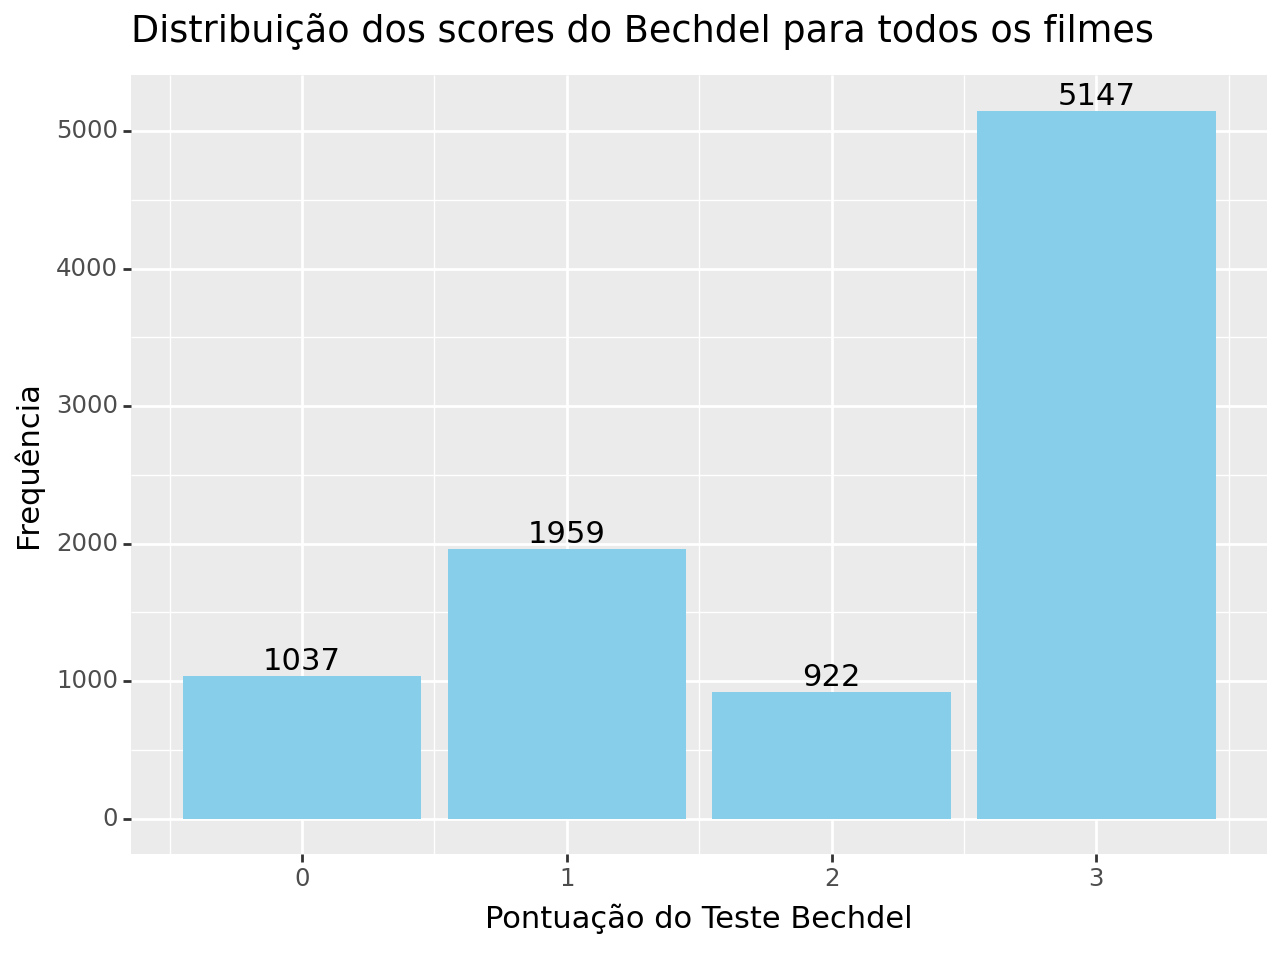

<Figure Size: (640 x 480)>

In [88]:
# Gráfico de distribuição dos scores do Bechdel para todos os filmes
plot = (
    pn.ggplot(bechdel_detailed_df, pn.aes(x="bt_score"))
    + pn.geom_bar(fill="skyblue")
    + pn.geom_text(
        pn.aes(label=pn.after_stat("count")), stat="count", nudge_y=0.125, va="bottom"
    )
    + pn.labs(
        title="Distribuição dos scores do Bechdel para todos os filmes",
        x="Pontuação do Teste Bechdel",
        y="Frequência",
    )
)

# Exibir o gráfico
plot

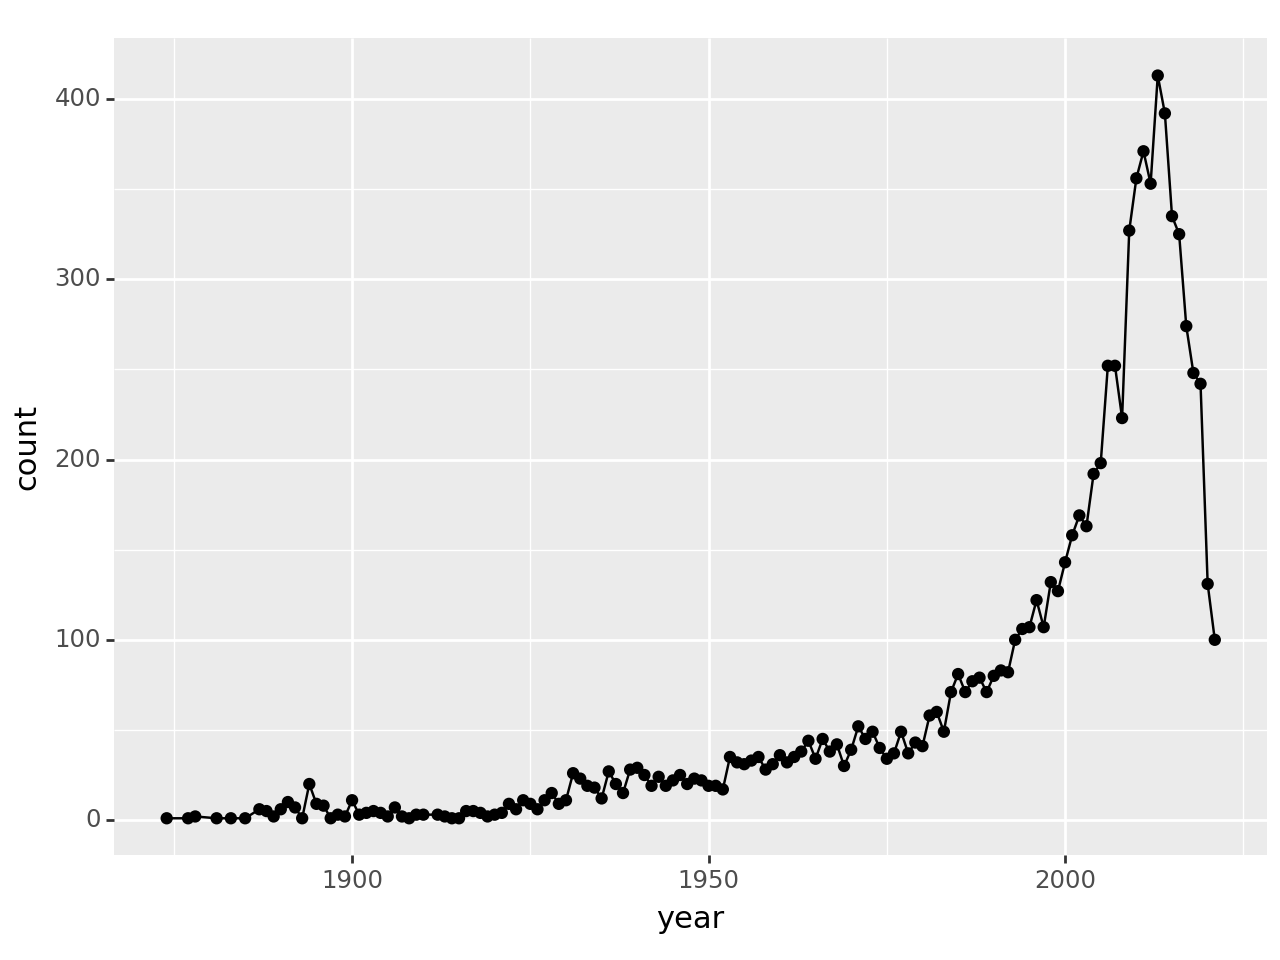

<Figure Size: (640 x 480)>

In [89]:
# Gráfico de pontos e linhas dos scores do Bechdel ao longo dos anos
from plotnine import *

plot = (
    pn.ggplot(bechdel_detailed_df)
    + pn.geom_point(aes("year", color="bt_score"), stat="count", show_legend=False)
    + pn.geom_line(aes("year", color="bt_score"), stat="count", show_legend=False)
)

# Exibir o gráfico
plot

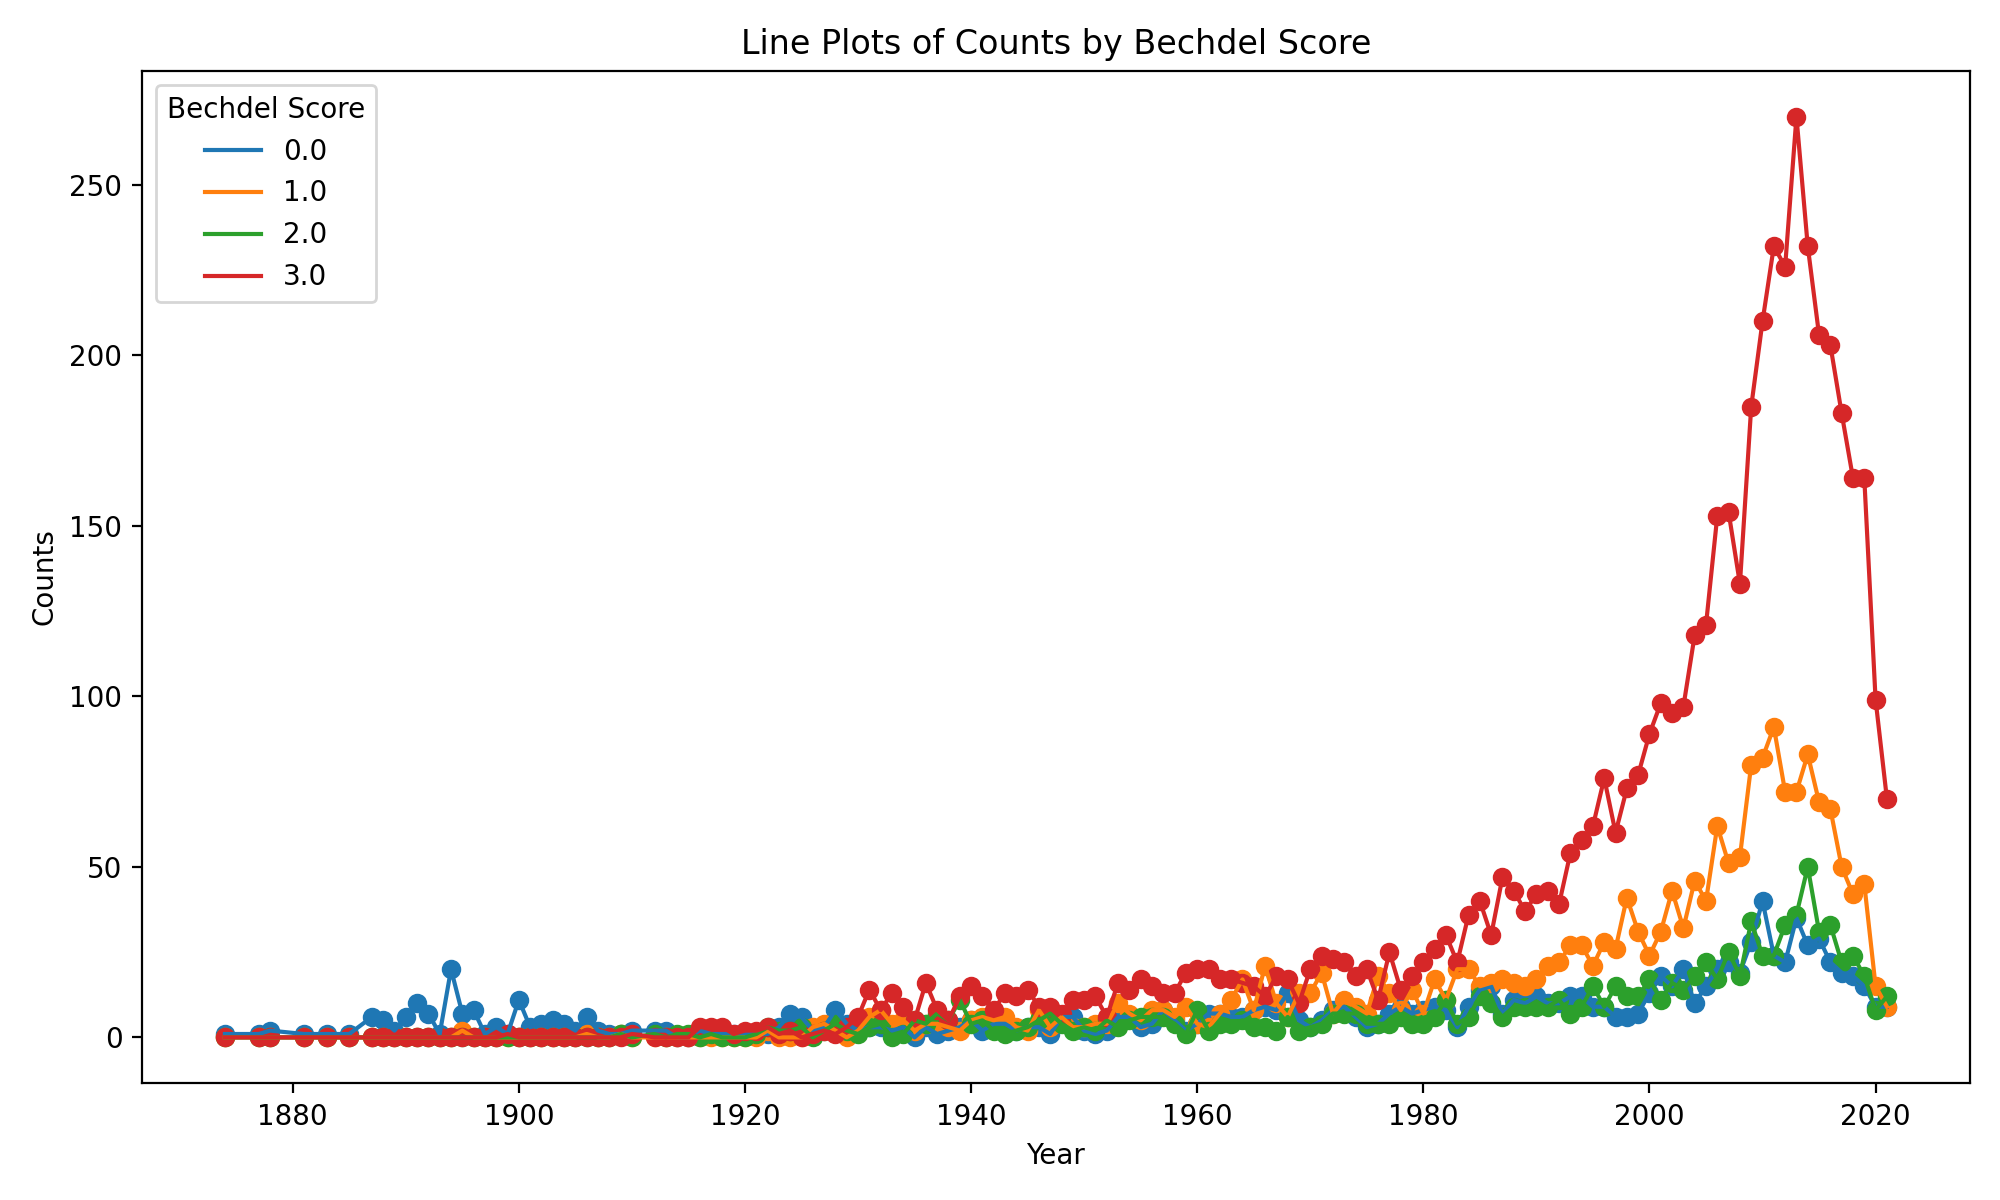

In [90]:
# Calculate the counts of each year for each Bechdel score
counts = bechdel_detailed_df.groupby(["year", "bt_score"]).size().unstack(fill_value=0)

# Get the unique Bechdel scores
bechdel_scores = counts.columns

# Set up the plot with adjusted figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the line plots for each Bechdel score
for bechdel_score in bechdel_scores:
    ax.plot(counts.index, counts[bechdel_score], label=bechdel_score)

# Plot the scatter points with counts as the y-values
for bechdel_score in bechdel_scores:
    ax.scatter(counts.index, counts[bechdel_score], label=None)

# Set the labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Counts")
ax.set_title("Line Plots of Counts by Bechdel Score")

# Add a legend with proper formatting
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Bechdel Score", loc="upper left")

# Adjust the layout to prevent overlap of labels
plt.tight_layout()

# Show the plot
plt.show()

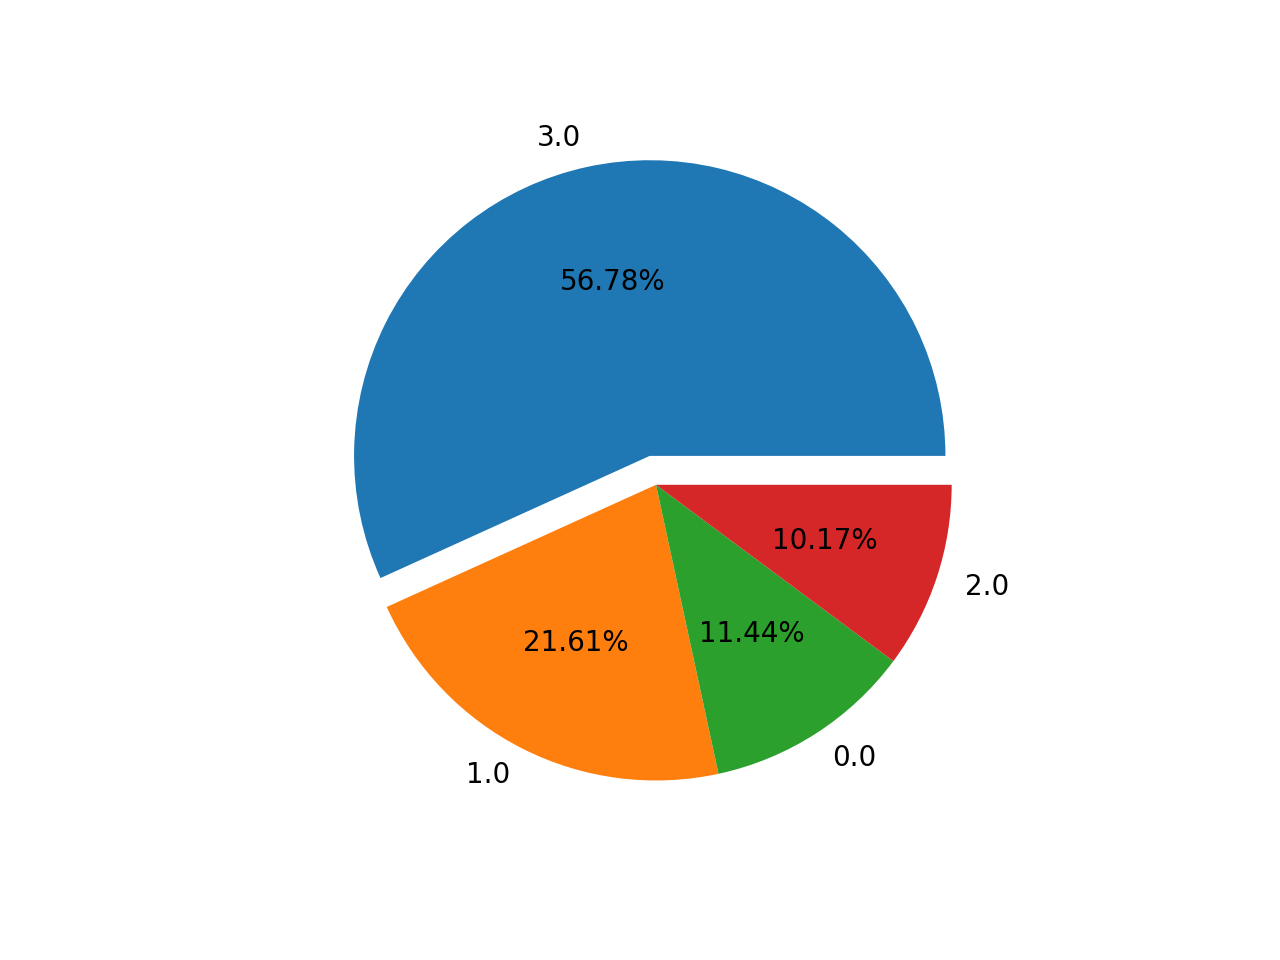

In [91]:
score_count_series = bechdel_detailed_df["bt_score"].value_counts()

# Configurar a fatia para destacar
gap = [0.1] + [0] * (len(score_count_series) - 1)

# Plotar o gráfico de pizza
plt.pie(
    np.array(score_count_series),
    labels=score_count_series.index,
    explode=gap,
    autopct="%.2f%%",
)

# Exibir o gráfico
plt.show()

In [92]:
# Carregando notas do IMDB
imdb = pd.read_csv("movies.csv")

# Selecting specific columns from imdb dataframe
imdbNew = imdb[["title", "rating"]]

# Merging dfNew with imdbNew based on 'title'
dfNew = pd.merge(bechdel_detailed_df, imdbNew, how="left", on="title")

dfNew.head()

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible,rating
0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0,NaN
1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0,NaN
2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0,NaN
3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0,NaN
4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0,NaN


In [93]:
# Removendo linhas com valores nulos e a coluna 'id'
dfNew = dfNew.dropna().drop("id", axis=1)

# Criando um novo dataframe apenas com 'year', 'bt_score' e 'rating' do IMDB
new = dfNew.groupby(["year", "bt_score"]).agg({"rating": "mean"}).reset_index()

# Exibindo os primeiros registros do novo dataframe
new.head()

,year,bt_score,rating
0,1891.0,0.0,5.70
1,1893.0,0.0,7.00
2,1894.0,0.0,4.86
3,1895.0,0.0,6.50
4,1896.0,0.0,3.90


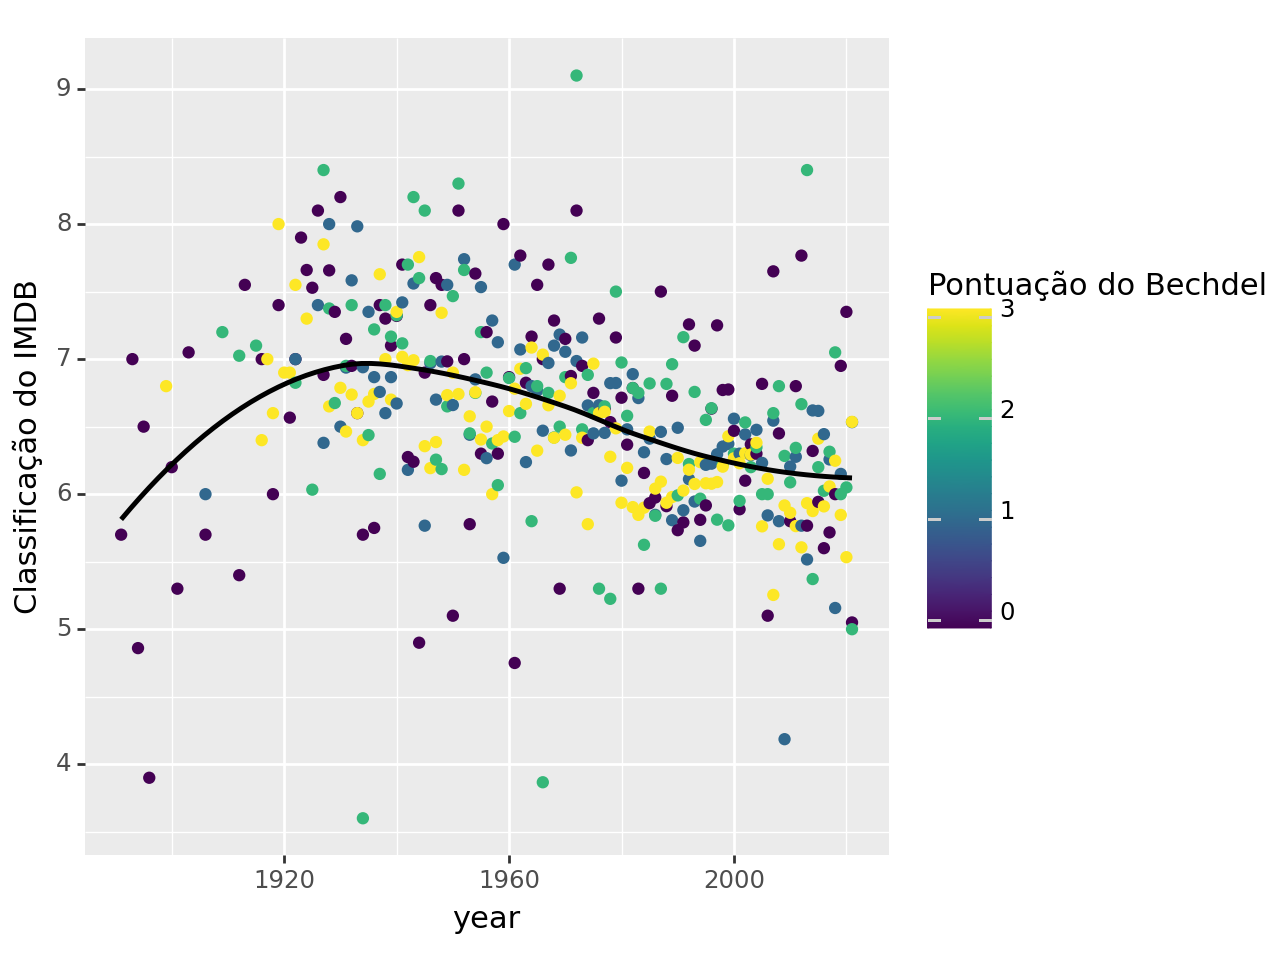

<Figure Size: (640 x 480)>

In [94]:
# Plotando o ano em relação à classificação do IMDB e ao Bechdel Score
plot = (
    pn.ggplot(new, aes(x="year", y="rating", color="bt_score"))
    + pn.geom_point()
    + pn.geom_smooth(method="loess", se=False)
    + pn.scale_y_continuous(name="Classificação do IMDB")
    + pn.labs(colour="Pontuação do Bechdel")
)

plot

### Dubious Proportion

In [95]:
dubious_count = bechdel_detailed_df["dubious"].value_counts()
percentage = dubious_count[1.0] / (dubious_count[1.0] + dubious_count[0.0]) * 100
print(f"Porcentagem de pontuações duvidosas de filmes: {percentage:.2f}%")

Porcentagem de pontuações duvidosas de filmes: 8.92%


Vamos investigar um pouco mais a fundo e ver como são realmente os filmes duvidosos.

In [96]:
# Filmes duvidosos
dubious_movies = bechdel_detailed_df[bechdel_detailed_df["dubious"] == 1]

# Exibir os primeiros registros dos filmes duvidosos
dubious_movies.head()

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible
66,Akrobatisches Potpourri,1895.0,1.0,1.0,11.0,9679.0,18987.0,2021-04-24 19:08:28,1.0
69,Baby&#39;s Dinner,1895.0,1.0,1.0,29.0,9715.0,19029.0,2021-04-29 01:35:15,1.0
126,"Princess Nicotine; or, The Smoke Fairy",1909.0,2.0,1.0,1009.0,4409.0,7862.0,2013-07-28 12:00:46,1.0
137,A Florida Enchantment,1914.0,2.0,1.0,3973.0,4457.0,7991.0,2013-08-10 05:01:03,1.0
148,"Raffles, the Amateur Cracksman",1917.0,2.0,1.0,8489.0,2019.0,2700.0,2011-02-11 21:49:04,1.0


In [97]:
# List of scores to calculate proportions for
scores = [0.0, 1.0, 2.0, 3.0]

# Calculate proportions using map and lambda function
proportions = list(
    map(
        lambda score: sum(dubious_movies["bt_score"] == score)
        / len(dubious_movies)
        * 100,
        scores,
    )
)

# Print the proportions
for score, proportion in zip(scores, proportions):
    print(f"Proportion of movies scored {score}: {proportion:.2f}%")

Proportion of movies scored 0.0: 2.84%
Proportion of movies scored 1.0: 9.64%
Proportion of movies scored 2.0: 13.47%
Proportion of movies scored 3.0: 74.04%


Isso é complicado porque nada é certo... e os seres humanos não gostam de incerteza. Mas eu realmente não quero simplesmente descartar essa informação. Acredito que seja melhor classificar os filmes em três categorias: aprovados no teste de Bechdel, reprovados no teste de Bechdel e duvidosos.

In [98]:
for index, bt_score in bechdel_detailed_df["bt_score"].items():
    if bt_score == 0:
        if bechdel_detailed_df.at[index, "dubious"] == 1:
            bechdel_detailed_df.at[index, "category"] = "Duvidoso"
        else:
            bechdel_detailed_df.at[
                index, "category"
            ] = "0-Menos de duas personagens femininas"
    elif bt_score == 1:
        if bechdel_detailed_df.at[index, "dubious"] == 1:
            bechdel_detailed_df.at[index, "category"] = "Duvidoso"
        else:
            bechdel_detailed_df.at[
                index, "category"
            ] = "1-Personagens femininas não conversam"
    elif bt_score == 2:
        if bechdel_detailed_df.at[index, "dubious"] == 1:
            bechdel_detailed_df.at[index, "category"] = "Duvidoso"
        else:
            bechdel_detailed_df.at[
                index, "category"
            ] = "2-Personagens femininas falam sobre homens"
    else:
        if bechdel_detailed_df.at[index, "dubious"] == 1:
            bechdel_detailed_df.at[index, "category"] = "Duvidoso"
        else:
            bechdel_detailed_df.at[index, "category"] = "3-Passa no Teste de Bechdel"

In [99]:
# bechdel_detailed_df["category"] = bechdel_detailed_df["bt_score"].map(
#    lambda score: "Duvidoso"
#    if bechdel_detailed_df.at[score, "dubious"] == 1
#    else "0-Menos de duas personagens femininas"
#    if score == 0
#    else "1-Personagens femininas não conversam"
#    if score == 1
#    else "2-Personagens femininas falam sobre homens"
#    if score == 2
#    else "3-Passa no Teste de Bechdel"
# )

In [100]:
bechdel_detailed_df.tail()

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible,category
9060,Encanto,2021.0,3.0,0.0,2953050.0,10151.0,19732.0,2021-12-02 00:36:48,1.0,3-Passa no Teste de Bechdel
9061,Love Hard,2021.0,2.0,0.0,10752004.0,10152.0,19735.0,2021-12-05 19:22:20,1.0,2-Personagens femininas falam sobre homens
9062,West Side Story,2021.0,3.0,0.0,3581652.0,10157.0,19743.0,2021-12-10 03:10:09,1.0,3-Passa no Teste de Bechdel
9063,Every Time a Bell Rings,2021.0,3.0,0.0,15943414.0,10158.0,19744.0,2021-12-10 08:03:02,1.0,3-Passa no Teste de Bechdel
9064,Single All The Way,2021.0,3.0,0.0,14315756.0,10161.0,19753.0,2021-12-15 10:10:36,1.0,3-Passa no Teste de Bechdel


### Mudanças ao longo dos anos

- A média do escore do Bechdel está aumentando?
- A proporção de filmes que passam no teste de Bechdel está aumentando?

**Nota importante**: Não faz sentido verificar o NÚMERO de filmes que passam no Teste de Bechdel ao longo dos anos devido ao efeito da população, também conhecido como efeito do tamanho. Um exemplo simples é quando falamos sobre mudanças na taxa de mortalidade ao longo do tempo, não o número de mortes no mundo, porque há mais pessoas neste planeta do que há 100 anos. O NÚMERO é inflado pelo crescimento da população, causando o efeito da população. Ao verificar a proporção ou taxa, mitigamos o efeito da população.

A mesma lógica se aplica aqui. Se mais filmes forem lançados este ano do que há 10 anos, haverá mais filmes que passam no teste de Bechdel, mesmo que a proporção de aprovação permaneça a mesma. Não faz sentido verificar o NÚMERO.

In [101]:
bechdel_year_mean = (
    bechdel_detailed_df.groupby(["year"])["bt_score"].mean().to_frame().reset_index()
)
bechdel_year_mean

,year,bt_score
0,1874.0,0.000000
1,1877.0,0.000000
2,1878.0,0.000000
3,1881.0,0.000000
4,1883.0,0.000000
...,...,...
135,2017.0,2.346715
136,2018.0,2.346774
137,2019.0,2.367769
138,2020.0,2.503817


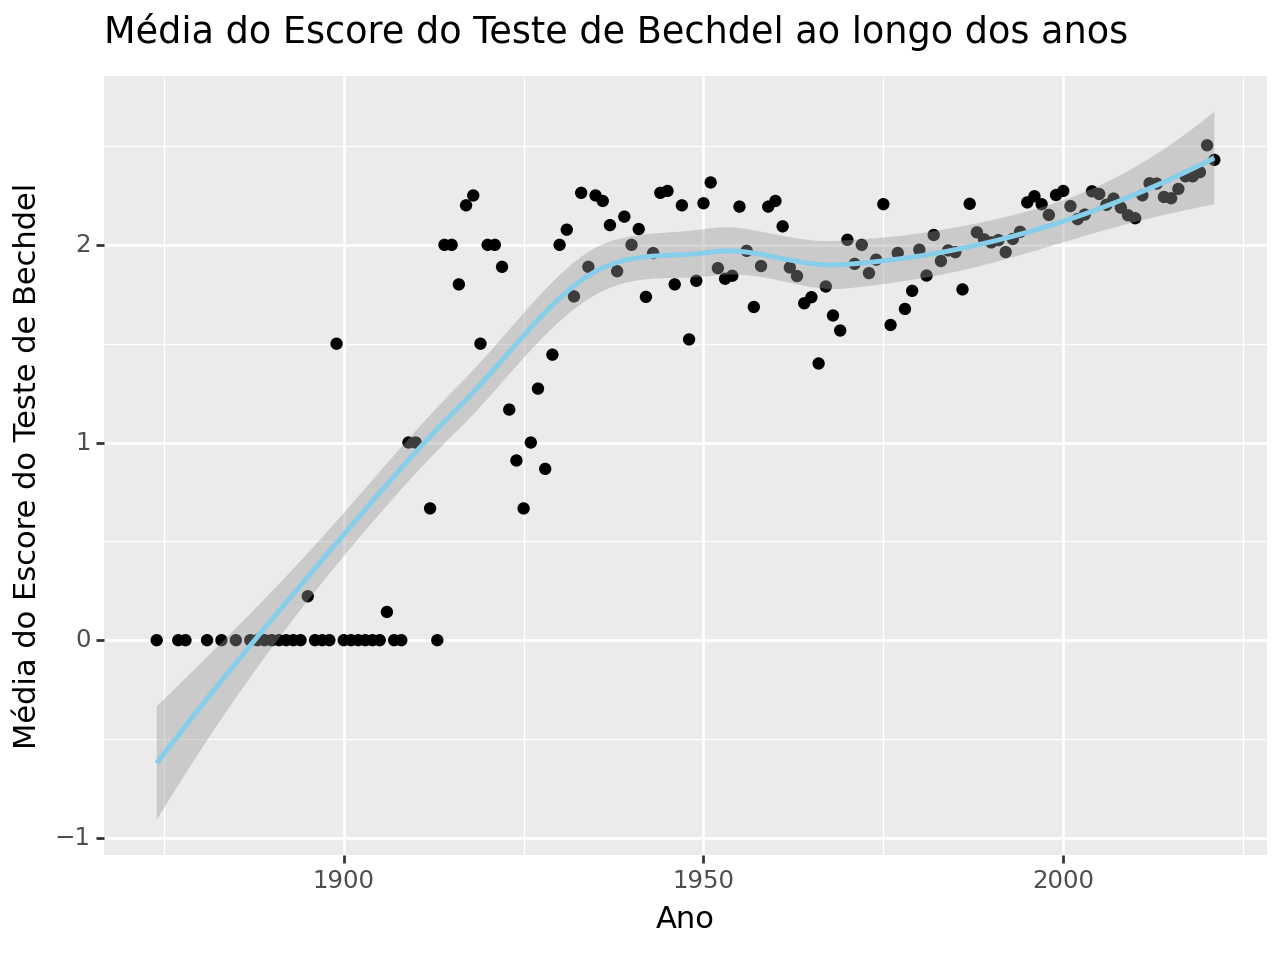

<Figure Size: (640 x 480)>

In [102]:
# geom_smooth() is an estimate of the conditional mean function.
# It draws a curve and gives you a general trend of the data
plot = (
    ggplot(bechdel_year_mean, aes(x="year", y="bt_score"))
    + geom_point()
    + geom_smooth(color="skyblue")
    + labs(
        title="Média do Escore do Teste de Bechdel ao longo dos anos",
        x="Ano",
        y="Média do Escore do Teste de Bechdel",
    )
)

plot

Boa notícia que a média do escore do Bechdel está aumentando ao longo dos anos! A linha suave nos ajuda a entender a tendência geral dos dados, mas eu não gosto muito de ver a linha abaixo de 0 nos primeiros anos. No entanto, isso tem a ver com o mecanismo do `geom_smooth()`, então vou deixar passar.

Será que é porque a proporção de filmes que passam no teste está aumentando? Vamos descobrir.

In [103]:
category_order = [
    "0-Menos de duas personagens femininas",
    "1-Personagens femininas não conversam",
    "2-Personagens femininas falam sobre homens",
    "Duvidoso",
    "3-Passa no Teste de Bechdel",
]

bechdel_df_ordered = bechdel_detailed_df.copy()
bechdel_df_ordered["category"] = pd.Categorical(
    bechdel_df_ordered["category"], categories=category_order, ordered=True
)

In [104]:
bechdel_df_ordered["category"].unique()

['0-Menos de duas personagens femininas', 'Duvidoso', '3-Passa no Teste de Bechdel', '1-Personagens femininas não conversam', '2-Personagens femininas falam sobre homens']
Categories (5, object): ['0-Menos de duas personagens femininas' < '1-Personagens femininas não conversam' < '2-Personagens femininas falam sobre homens' < 'Duvidoso' < '3-Passa no Teste de Bechdel']

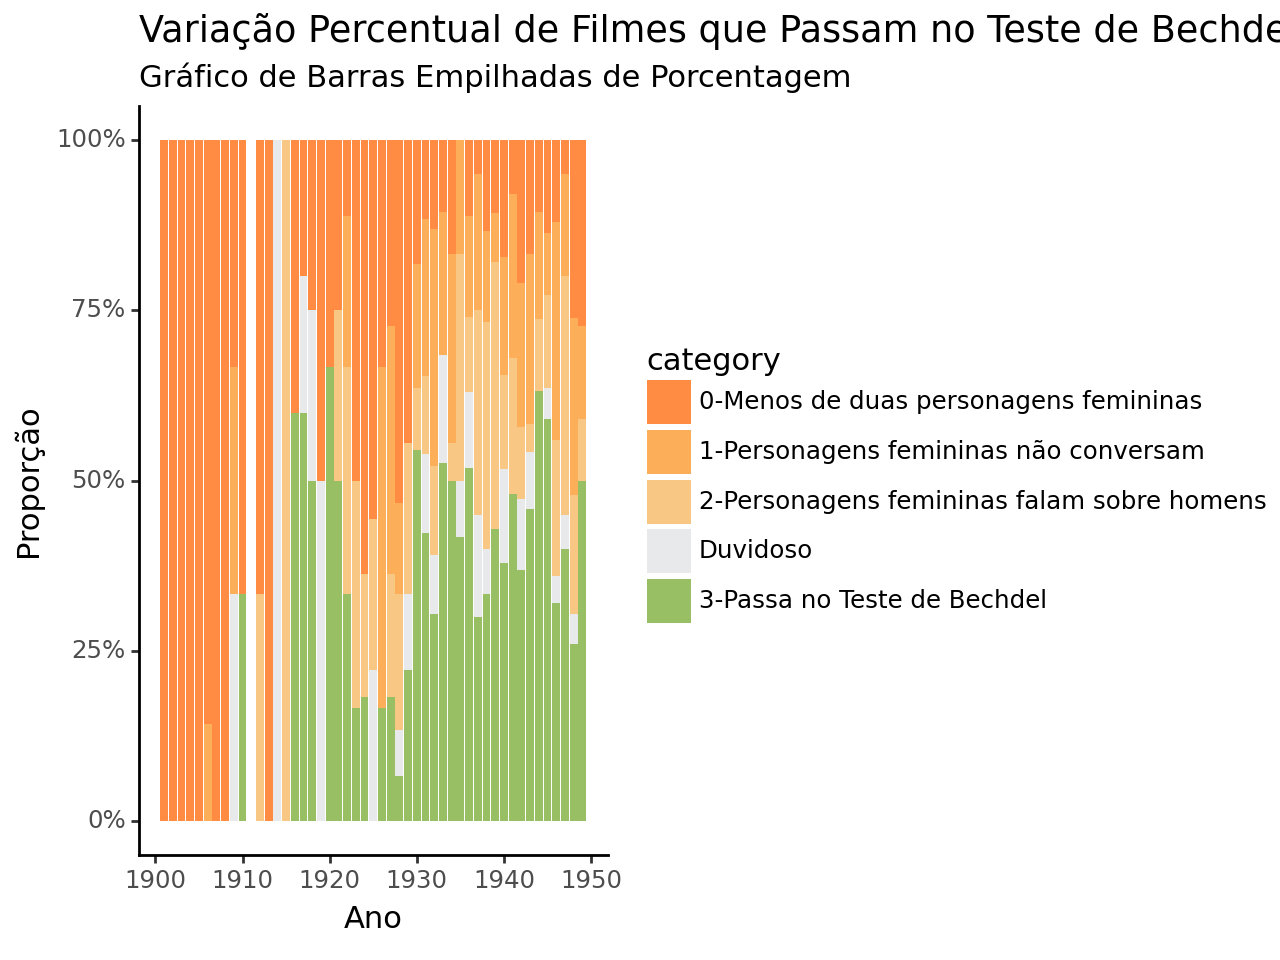

<Figure Size: (640 x 480)>

In [105]:
# fitting all the years in the graph looks terrible
# Here I selected the data between 1950-2000 to make it a little better, but it is still not good

plot = (
    pn.ggplot(
        bechdel_df_ordered[
            (bechdel_df_ordered["year"] > 1900) & (bechdel_df_ordered["year"] < 1950)
        ],
        aes(fill="category", x="year"),
    )
    + pn.geom_bar(position="fill")
    + pn.scale_y_continuous(labels=percent_format())
    + pn.scale_fill_manual(
        values=["#FF8C42", "#FCAF58", "#F9C784", "#E8E9EB", "#98BF64"]
    )
    + pn.labs(
        title="Variação Percentual de Filmes que Passam no Teste de Bechdel ao longo dos Anos",
        subtitle="Gráfico de Barras Empilhadas de Porcentagem",
        x="Ano",
        y="Proporção",
    )
    + theme_classic()
)

plot

Segmenting yearly seems a little difficult to read. I am going to try segmenting by 10 years.

In [106]:
# Adding a new column that segment the years in to 10-year intervals
bechdel_df_ordered["year_interval"] = bechdel_df_ordered["year"].apply(
    lambda year: f"{int(year - year % 10 + 1)}-{int(year - year % 10 + 10)}"
)
bechdel_df_ordered

,title,year,bt_score,dubious,imdbid,id,submitterid,date,visible,category,year_interval
0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0,0-Menos de duas personagens femininas,1871-1880
1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0,0-Menos de duas personagens femininas,1871-1880
2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0,0-Menos de duas personagens femininas,1871-1880
3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0,0-Menos de duas personagens femininas,1871-1880
4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0,0-Menos de duas personagens femininas,1881-1890
...,...,...,...,...,...,...,...,...,...,...,...
9060,Encanto,2021.0,3.0,0.0,2953050.0,10151.0,19732.0,2021-12-02 00:36:48,1.0,3-Passa no Teste de Bechdel,2021-2030
9061,Love Hard,2021.0,2.0,0.0,10752004.0,10152.0,19735.0,2021-12-05 19:22:20,1.0,2-Personagens femininas falam sobre homens,2021-2030
9062,West Side Story,2021.0,3.0,0.0,3581652.0,10157.0,19743.0,2021-12-10 03:10:09,1.0,3-Passa no Teste de Bechdel,2021-2030
9063,Every Time a Bell Rings,2021.0,3.0,0.0,15943414.0,10158.0,19744.0,2021-12-10 08:03:02,1.0,3-Passa no Teste de Bechdel,2021-2030


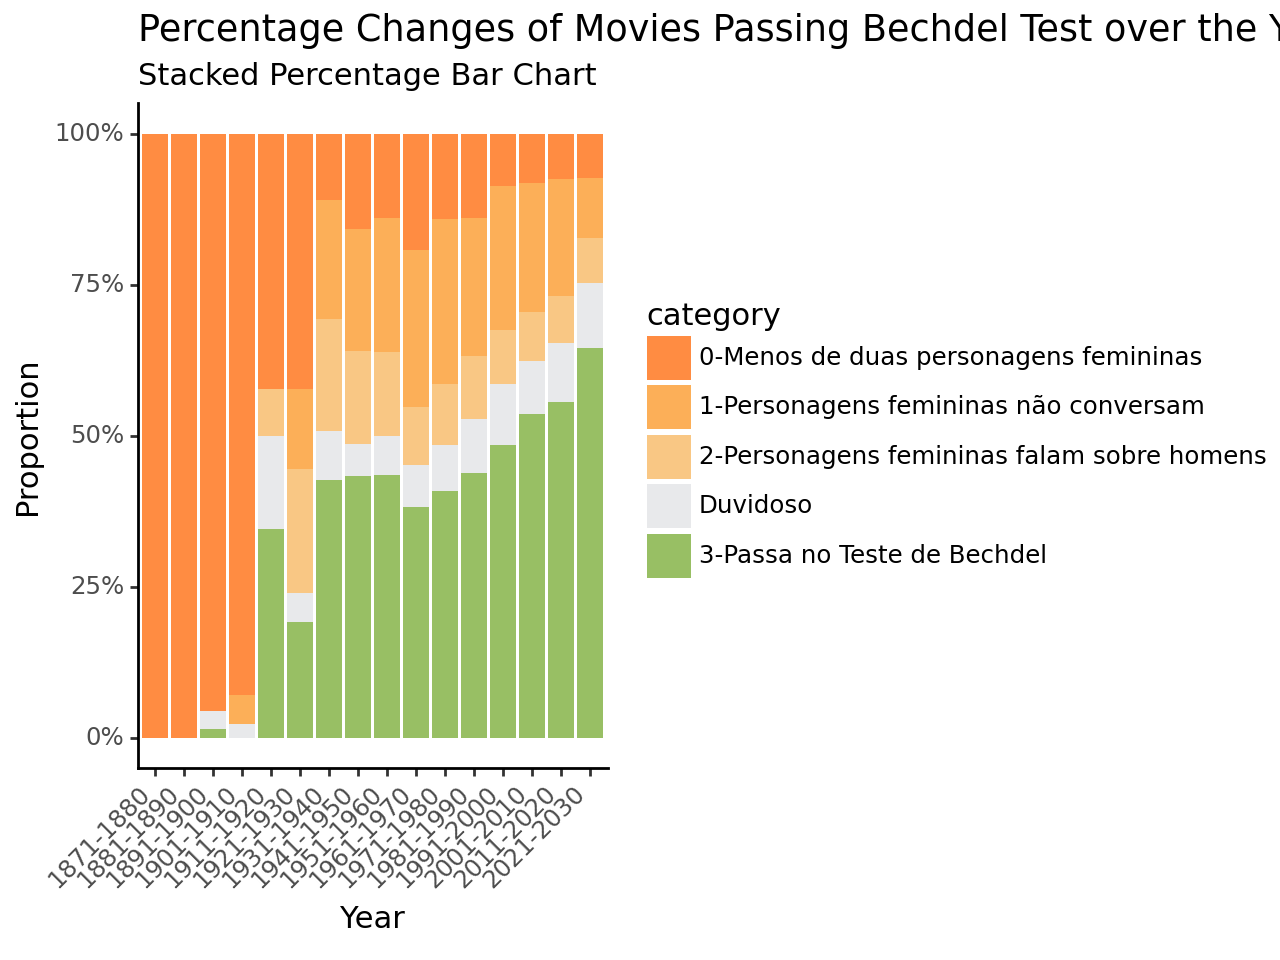

<Figure Size: (640 x 480)>

In [107]:
(
    ggplot(bechdel_df_ordered, aes(fill="category", x="year_interval"))
    + geom_bar(position="fill")
    + scale_y_continuous(labels=percent_format())
    + scale_fill_manual(values=["#FF8C42", "#FCAF58", "#F9C784", "#E8E9EB", "#98BF64"])
    + labs(
        title="Percentage Changes of Movies Passing Bechdel Test over the Years",
        subtitle="Stacked Percentage Bar Chart",
        x="Year",
        y="Proportion",
    )
    + theme_classic()
    + theme(axis_text_x=element_text(angle=45, hjust=1))
)

I think this one is better. And the general trend is easier to see. 

Filmes duvidosos estão no meio para que os olhos humanos possam comparar melhor as proporções verde e laranja. Podemos ver que à medida que a proporção verde está aumentando, a proporção laranja está ficando mais clara. Ou seja, muitos filmes ainda não passam no teste, mas mais estão recebendo pontuações de 1 e 2 em vez de 0, o que mostra progresso. Uhu!

Agora, quero enfatizar que os termos "mais" ou "menos" aqui se referem exclusivamente a proporção, porcentagem ou razão. Eles não se referem ao número puro, volume ou quantidade de filmes. Comparar números é sem sentido. Por quê? Por causa do efeito da população, ou efeito do tamanho.

Por exemplo, pode haver mais filmes (em termos de número) que passam no teste de Bechdel no ano de 2122 do que em 2022 simplesmente porque o ano de 2122 teve 10 vezes mais filmes lançados do que 2022. A proporção pode diminuir, mesmo que o número aumente, então apenas os números não nos fornecem informações úteis. Outro exemplo que ouvi recentemente é que um amigo meu está trabalhando com Processamento de Linguagem Natural (PLN) e descobriu que os comentários negativos na análise de sentimentos tendem a ser mais curtos, mas a razão pode ser que existam mais comentários curtos (em termos de número) na internet em geral, então sua conclusão pode não ser significativa. Essa armadilha tem o termo "população" porque é comumente associada à população. A China tem mais nascimentos do que o Japão simplesmente porque a China tem uma população maior. Isso não é interessante. O que é interessante é a taxa de natalidade, não o número de nascimentos. Da mesma forma, falamos sobre o PIB per capita, não sobre o PIB como um todo. É surpreendente com que frequência interpretamos erroneamente o efeito da população como algo significativo.

Ok, vamos voltar à análise. Agora que temos uma compreensão bastante boa dos dados do teste de Bechdel e da tendência geral ao longo do tempo, vamos compará-los com métricas fora das telas.

In [108]:
import ast
from collections import defaultdict
import seaborn as sns

# Carregar os novos conjuntos de dados
links_df = pd.read_csv("links.csv", index_col=0)
credits_df = pd.read_csv("credits.csv")

# Remover duplicatas em credits_df
credits_df = credits_df.drop_duplicates()

# Mesclar os dataframes
bechdel_df = bechdel_detailed_df.merge(
    links_df, left_on="imdbid", right_on="imdbId", how="inner"
).drop(columns=["imdbId"])
bechdel_df = bechdel_df.merge(
    credits_df, left_on="tmdbId", right_on="id", how="inner"
).drop(columns=["imdbid", "submitterid", "date", "visible", "tmdbId", "id_x", "id_y"])
bechdel_df.head()

,title,year,bt_score,dubious,category,cast,crew
0,Passage de Venus,1874.0,0.0,0.0,0-Menos de duas personagens femininas,[],"[{'credit_id': '55325dc09251417ae30009c3', 'de..."
1,Sallie Gardner at a Gallop,1878.0,0.0,0.0,0-Menos de duas personagens femininas,"[{'cast_id': 5, 'character': 'Herself - Sallie...","[{'credit_id': '52fe4ce29251416c91103327', 'de..."
2,Buffalo Running,1883.0,0.0,0.0,0-Menos de duas personagens femininas,[],"[{'credit_id': '5831b973c3a3685b960216b5', 'de..."
3,Man Walking Around the Corner,1887.0,0.0,0.0,0-Menos de duas personagens femininas,[],"[{'credit_id': '52fe4c239251416c910f132b', 'de..."
4,Accordion Player,1888.0,0.0,0.0,0-Menos de duas personagens femininas,"[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '52fe49c39251416c750d2a8b', 'de..."


Existem alguns valores vazios em elenco (cast) e equipe (crew). Vamos calcular a porcentagem desses valores vazios e ver o que devemos fazer.

In [109]:
count1 = sum(bechdel_df["cast"].apply(lambda x: len(ast.literal_eval(x)) == 0))
count2 = sum(bechdel_df["crew"].apply(lambda x: len(ast.literal_eval(x)) == 0))

empty_cast_percentage = count1 / len(bechdel_df) * 100
empty_crew_percentage = count2 / len(bechdel_df) * 100

print("Empty cast percentage:", f"{empty_cast_percentage:.2f}%")
print("Empty crew percentage:", f"{empty_crew_percentage:.2f}%")

Empty cast percentage: 0.41%
Empty crew percentage: 0.11%


Esta é uma porcentagem muito pequena, então podemos prosseguir e removê-los. Além disso, precisamos remover duplicatas.

In [110]:
bechdel_df = bechdel_df[(bechdel_df["cast"] != "[]") & (bechdel_df["crew"] != "[]")]
bechdel_df = bechdel_df.drop_duplicates().reset_index(drop=True)

No entanto, há outro problema de gêneros desconhecidos no conjunto de dados do Kaggle. A fonte de dados original do conjunto de dados do Kaggle não manteve um registro detalhado das informações de gênero. Na verdade, há muitos dados desconhecidos.

In [111]:
temp_df = pd.DataFrame(
    columns=[
        "id",
        "cast_total_num",
        "cast_female_num",
        "cast_male_num",
        "cast_unknown_num",
        "crew_total_num",
        "crew_female_num",
        "crew_male_num",
        "crew_unknown_num",
        "Directing_total",
        "Directing_female",
        "Directing_male",
        "Directing_unknown",
        "Writing_total",
        "Writing_female",
        "Writing_male",
        "Writing_unknown",
    ]
)
overview_info = defaultdict(int)

for index, row in bechdel_df.iterrows():
    cast_info, crew_info, crew_department = (
        defaultdict(int),
        defaultdict(int),
        defaultdict(int),
    )
    cast_list = ast.literal_eval(row["cast"])
    crew_list = ast.literal_eval(row["crew"])

    # Count everything in cast
    for cast in cast_list:
        gender = cast.get("gender", None)
        if gender == 2:
            cast_info["male"] += 1
        elif gender == 1:
            cast_info["female"] += 1
        elif gender == 0:
            cast_info["unknown"] += 1
        else:
            print(f"Oops1 index {index} is unusual: {cast}")

    temp_df.at[index, "cast_total_num"] = len(cast_list)
    temp_df.at[index, "cast_female_num"] = cast_info["female"]
    temp_df.at[index, "cast_male_num"] = cast_info["male"]
    temp_df.at[index, "cast_unknown_num"] = cast_info["unknown"]

    # Count everything in crew
    for crew in crew_list:
        gender = crew.get("gender", None)
        department = str(crew.get("department", ""))

        if gender == 2:
            crew_info["male"] += 1
            crew_department[department + "_male"] += 1
            crew_department[department + "_total"] += 1
        elif gender == 1:
            crew_info["female"] += 1
            crew_department[department + "_female"] += 1
            crew_department[department + "_total"] += 1
        elif gender == 0:
            crew_info["unknown"] += 1
            crew_department[department + "_unknown"] += 1
            crew_department[department + "_total"] += 1
        else:
            print(f"Oops2 index {index} is unusual: {crew}")

    temp_df.at[index, "crew_total_num"] = len(crew_list)
    temp_df.at[index, "crew_female_num"] = crew_info["female"]
    temp_df.at[index, "crew_male_num"] = crew_info["male"]
    temp_df.at[index, "crew_unknown_num"] = crew_info["unknown"]

    # Aggregate all counts to overview data
    overview_info["cast_total"] += len(cast_list)
    for cast_gender, count in cast_info.items():
        overview_info["cast_" + str(cast_gender)] += count
    overview_info["crew_total"] += len(crew_list)
    for crew_gender, count in crew_info.items():
        overview_info["crew_" + str(crew_gender)] += count
    for department, count in crew_department.items():
        overview_info[department] += count
        temp_df.at[index, department] = count

temp_df = temp_df.fillna(0)  # Replace all the NaN with 0

print(
    "Percentage of unknowns in Cast:",
    f'{(overview_info["cast_unknown"] / overview_info["cast_total"] * 100):.2f}%',
)
print(
    "Percentage of unknowns in Crew:",
    f'{(overview_info["crew_unknown"] / overview_info["crew_total"] * 100):.2f}%',
)
print(
    "Percentage of unknowns in Directing:",
    f'{(overview_info["Directing_unknown"] / overview_info["Directing_total"] * 100):.2f}%',
)
print(
    "Percentage of unknowns in Writing:",
    f'{(overview_info["Writing_unknown"] / overview_info["Writing_total"] * 100):.2f}%',
)

Percentage of unknowns in Cast: 36.29%
Percentage of unknowns in Crew: 59.01%
Percentage of unknowns in Directing: 39.44%
Percentage of unknowns in Writing: 38.91%


Já que existem muitos valores desconhecidos, podemos preencher as lacunas prevendo o gênero a partir do primeiro nome. O pacote gender-guesser é uma boa escolha. Este pacote trata o gênero como binário (pode ser uma limitação) e nos diz se um primeiro nome é masculino/feminino, ou predominantemente masculino/feminino, ou desconhecido/androgênico. Por exemplo, meu nome chinês, Yuhan, pode pertencer a qualquer gênero e o pacote informaria que meu gênero é desconhecido.

In [112]:
import gender_guesser.detector as gender

predictor = gender.Detector()

gender_df = pd.DataFrame(
    columns=[
        "cast_total_num",
        "cast_female_num",
        "cast_male_num",
        "cast_unknown_num",
        "crew_total_num",
        "crew_female_num",
        "crew_male_num",
        "crew_unknown_num",
        "Directing_total",
        "Directing_female",
        "Directing_male",
        "Directing_unknown",
        "Writing_total",
        "Writing_female",
        "Writing_male",
        "Writing_unknown",
    ]
)
overview_info = defaultdict(int)

for index, row in bechdel_df.iterrows():
    cast_info, crew_info, crew_department = (
        defaultdict(int),
        defaultdict(int),
        defaultdict(int),
    )
    cast_list = ast.literal_eval(row["cast"])
    crew_list = ast.literal_eval(row["crew"])

    # count everything in cast
    for cast in cast_list:
        if cast["gender"] == 2:  # male
            cast_info["male"] += 1
        elif cast["gender"] == 1:  # female
            cast_info["female"] += 1
        elif cast["gender"] == 0:  # unknown gender so we predict from first name
            first_name = cast["name"].split(" ")[0]
            predicted_gender = predictor.get_gender(first_name)
            if predicted_gender == "male" or predicted_gender == "mostly_male":
                cast_info["male"] += 1
            elif predicted_gender == "female" or predicted_gender == "mostly_female":
                cast_info["female"] += 1
            elif predicted_gender == "unknown" or predicted_gender == "andy":
                cast_info["unknown"] += 1
        else:
            print(f"Oops1 index{index} is unusal: {cast}")
    gender_df.at[index, "cast_total_num"] = len(cast_list)
    gender_df.at[index, "cast_female_num"] = cast_info["female"]
    gender_df.at[index, "cast_male_num"] = cast_info["male"]
    gender_df.at[index, "cast_unknown_num"] = cast_info["unknown"]

    # count evetything in crew
    for crew in crew_list:
        if crew["gender"] == 2:
            crew_info["male"] += 1
            crew_department[str(crew["department"]) + "_male"] += 1
            crew_department[str(crew["department"]) + "_total"] += 1
        elif crew["gender"] == 1:
            crew_info["female"] += 1
            crew_department[str(crew["department"]) + "_female"] += 1
            crew_department[str(crew["department"]) + "_total"] += 1
        elif crew["gender"] == 0:
            first_name = crew["name"].split(" ")[0]
            predicted_gender = predictor.get_gender(first_name)
            if predicted_gender == "male" or predicted_gender == "mostly_male":
                crew_info["male"] += 1
                crew_department[str(crew["department"]) + "_male"] += 1
            elif predicted_gender == "female" or predicted_gender == "mostly_female":
                crew_info["female"] += 1
                crew_department[str(crew["department"]) + "_female"] += 1
            elif predicted_gender == "unknown" or predicted_gender == "andy":
                crew_info["unknown"] += 1
                crew_department[str(crew["department"]) + "_unknown"] += 1
            crew_department[str(crew["department"]) + "_total"] += 1
        else:
            print(f"Oops2 index{index} is unusal: {crew}")
    gender_df.at[index, "crew_total_num"] = len(crew_list)
    gender_df.at[index, "crew_female_num"] = crew_info["female"]
    gender_df.at[index, "crew_male_num"] = crew_info["male"]
    gender_df.at[index, "crew_unknown_num"] = crew_info["unknown"]

    # aggregate all counts to overview data
    overview_info["cast_total"] += len(cast_list)
    for cast_gender, count in cast_info.items():
        overview_info["cast_" + str(cast_gender)] += count
    overview_info["crew_total"] += len(crew_list)
    for crew_gender, count in crew_info.items():
        overview_info["crew_" + str(crew_gender)] += count
    for department, count in crew_department.items():
        overview_info[department] += count
        gender_df.at[index, department] = count
gender_df = gender_df.fillna(0)
print(
    "Percentage of unknowns in Cast:",
    str(
        "{:.2f}".format(
            overview_info["cast_unknown"] / overview_info["cast_total"] * 100
        )
    )
    + "%",
)
print(
    "Percentage of unknowns in Crew:",
    "{:.2f}".format(overview_info["crew_unknown"] / overview_info["crew_total"] * 100)
    + "%",
)
print(
    "Percentage of unknowns in Directing:",
    str(
        "{:.2f}".format(
            overview_info["Directing_unknown"] / overview_info["Directing_total"] * 100
        )
    )
    + "%",
)
print(
    "Percentage of unknowns in Writing:",
    str(
        "{:.2f}".format(
            overview_info["Writing_unknown"] / overview_info["Writing_total"] * 100
        )
    )
    + "%",
)

Percentage of unknowns in Cast: 4.78%
Percentage of unknowns in Crew: 4.99%
Percentage of unknowns in Directing: 4.21%
Percentage of unknowns in Writing: 4.99%


Os percentuais de desconhecido diminuíram significativamente, o que é ótimo! Agora, é hora de decidir quais métricas queremos. As proporções femininas que considero importantes são:

    Proporção de mulheres no elenco
    Proporção de mulheres na equipe
    Proporção de mulheres na direção (incluindo diretor, assistente de direção, etc.)
    Proporção de mulheres na equipe de roteiristas

Portanto, podemos adicionar uma nova coluna executando:

In [113]:
bechdel_df["cast_female_ratio"] = (
    gender_df["cast_female_num"] / gender_df["cast_total_num"]
)
bechdel_df["crew_female_ratio"] = (
    gender_df["crew_female_num"] / gender_df["crew_total_num"]
)
bechdel_df["directing_female_ratio"] = (
    gender_df["Directing_female"] / gender_df["Directing_total"]
)
bechdel_df["writing_female_ratio"] = (
    gender_df["Writing_female"] / gender_df["Writing_total"]
)
bechdel_df.head()

,title,year,bt_score,dubious,category,cast,crew,cast_female_ratio,crew_female_ratio,directing_female_ratio,writing_female_ratio
0,Sallie Gardner at a Gallop,1878.0,0.0,0.0,0-Menos de duas personagens femininas,"[{'cast_id': 5, 'character': 'Herself - Sallie...","[{'credit_id': '52fe4ce29251416c91103327', 'de...",0.5,0.0,0.0,NaN
1,Accordion Player,1888.0,0.0,0.0,0-Menos de duas personagens femininas,"[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '52fe49c39251416c750d2a8b', 'de...",0.0,0.0,0.0,NaN
2,"Monkeyshines, No. 1",1890.0,0.0,0.0,0-Menos de duas personagens femininas,"[{'cast_id': 10, 'character': 'Himself', 'cred...","[{'credit_id': '52fe44d99251416c9101ef9f', 'de...",0.0,0.0,0.0,NaN
3,"Monkeyshines, No. 2",1890.0,0.0,0.0,0-Menos de duas personagens femininas,"[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '52fe450c9251416c91025b0b', 'de...",0.0,0.0,0.0,NaN
4,"Monkeyshines, No. 3",1890.0,0.0,0.0,0-Menos de duas personagens femininas,"[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '52fe450c9251416c91025b2f', 'de...",0.0,0.0,0.0,NaN


Existem alguns valores NaN na coluna "writing_female_ratio" porque 0/0 resulta em NaN. Se o número total de escritores for 0 (denominador), então os registros desses filmes provavelmente estão incompletos e não são úteis para nós. Vamos remover esses valores nulos. Além disso, desta vez, não podemos mais considerar os filmes "dubious" ao comparar as métricas, pois as pontuações duvidosas não são confiáveis.

In [114]:
bechdel_df_no_nan = bechdel_df.dropna().reset_index(drop=True)
bechdel_df_no_nan_no_dubious = bechdel_df_no_nan[
    bechdel_df_no_nan["dubious"] == 0
].reset_index(drop=True)

/home/luis/anaconda3/envs/py311/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 40'. Pick better value with 'binwidth'.


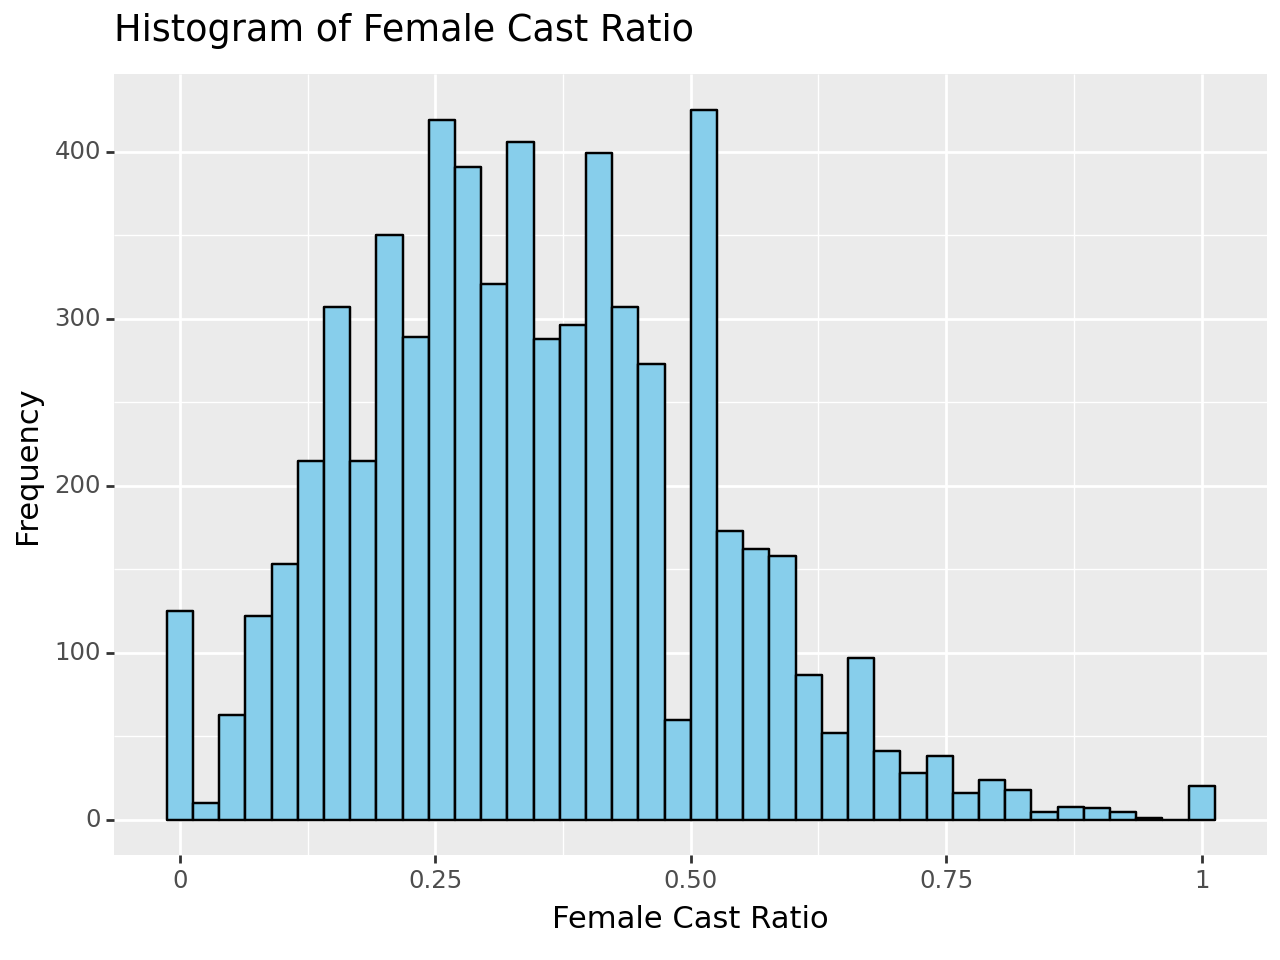

<Figure Size: (640 x 480)>

In [115]:
(
    ggplot(bechdel_df_no_nan_no_dubious, aes(x="cast_female_ratio"))
    + geom_histogram(fill="skyblue", color="black")
    + labs(title="Histogram of Female Cast Ratio", x="Female Cast Ratio", y="Frequency")
)

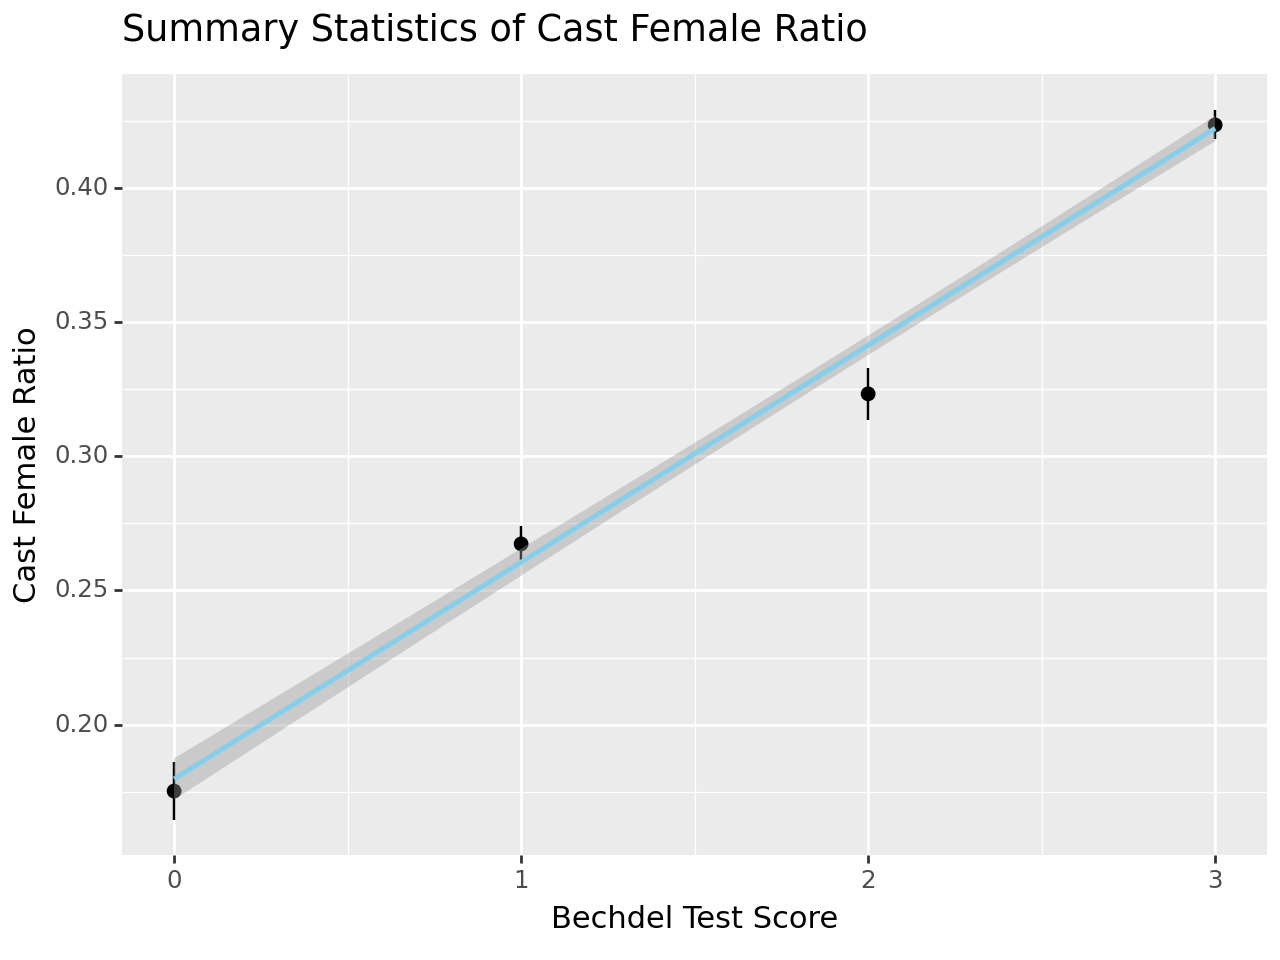

<Figure Size: (640 x 480)>

In [116]:
# Summary statistics
(
    ggplot(bechdel_df_no_nan_no_dubious, aes(x="bt_score", y="cast_female_ratio"))
    + stat_summary()
    + geom_smooth(color="skyblue")
    + labs(
        title="Summary Statistics of Cast Female Ratio",
        x="Bechdel Test Score",
        y="Cast Female Ratio",
    )
)

As barras de erro não se sobrepõem, o que indica que as médias dos 4 grupos, onde bt_score = 0, 1, 2 e 3, são estatisticamente diferentes. E a correlação positiva é muito evidente.

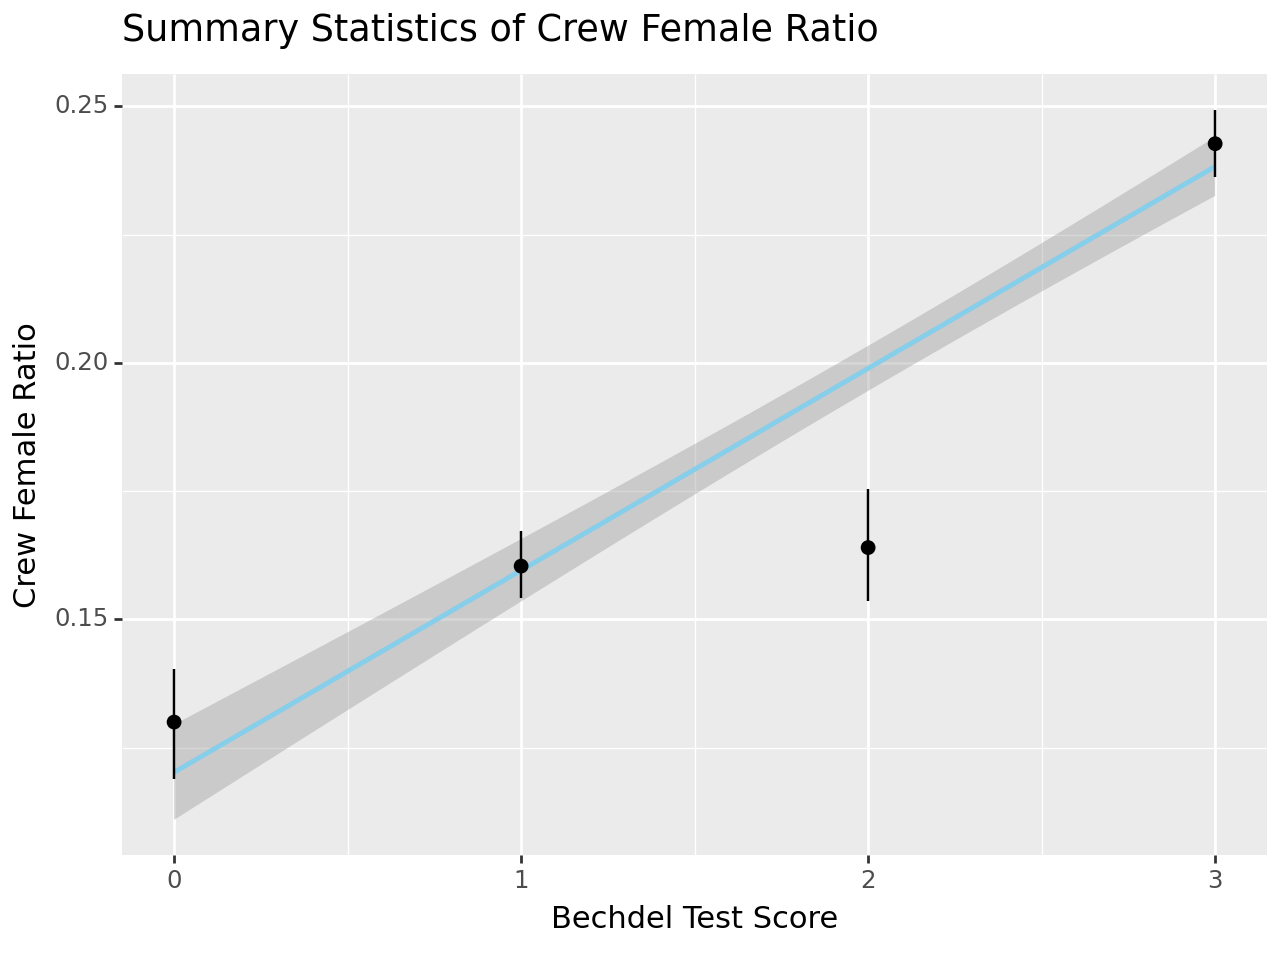

<Figure Size: (640 x 480)>

In [117]:
# Summary statistics
(
    ggplot(bechdel_df_no_nan_no_dubious, aes(x="bt_score", y="crew_female_ratio"))
    + geom_smooth(color="skyblue")
    + stat_summary()
    + labs(
        title="Summary Statistics of Crew Female Ratio",
        x="Bechdel Test Score",
        y="Crew Female Ratio",
    )
)

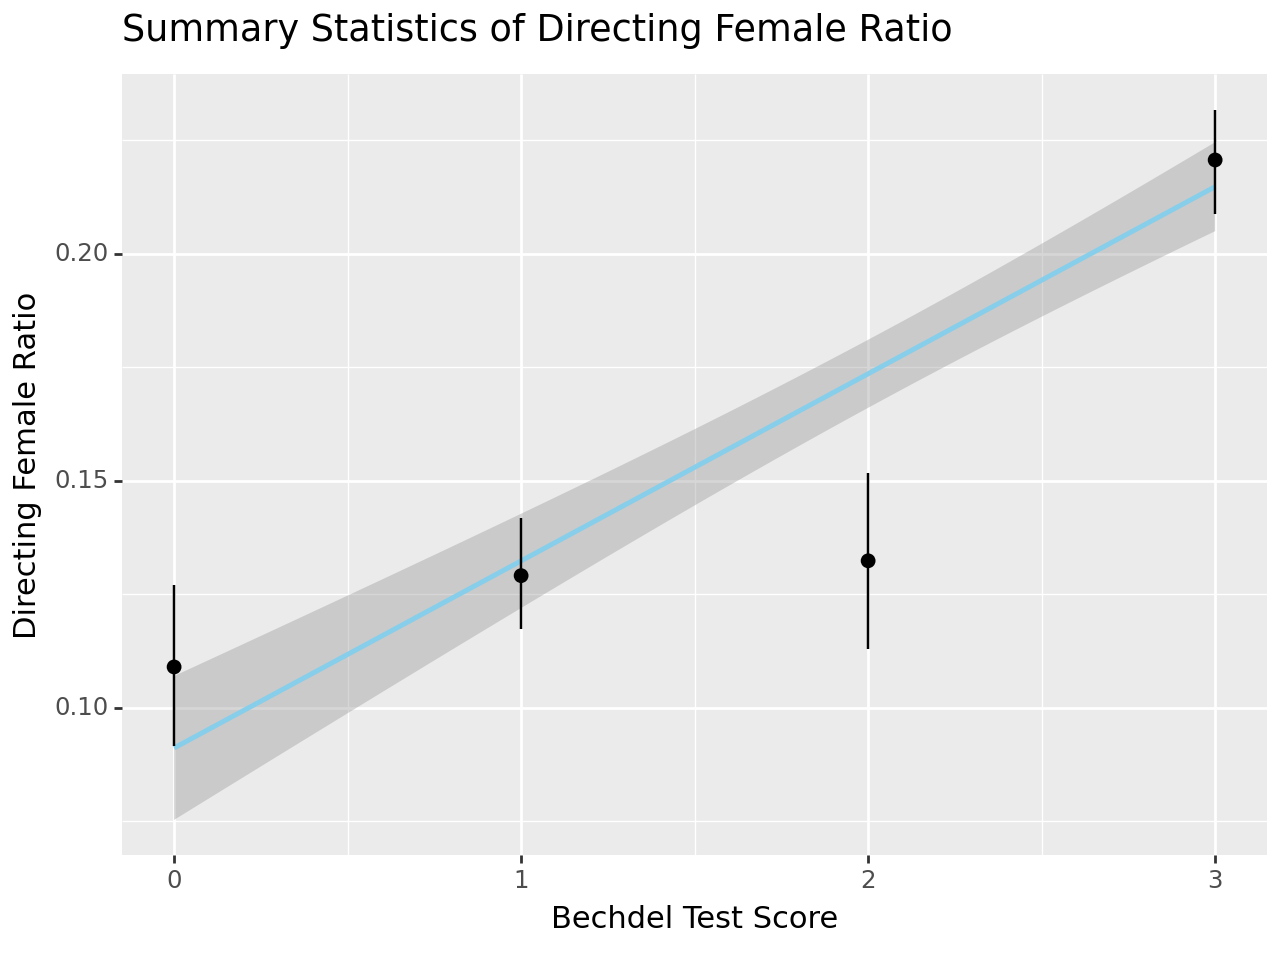

<Figure Size: (640 x 480)>

In [118]:
# Summary statistics
(
    ggplot(bechdel_df_no_nan_no_dubious, aes(x="bt_score", y="directing_female_ratio"))
    + geom_smooth(color="skyblue")
    + stat_summary()
    + labs(
        title="Summary Statistics of Directing Female Ratio",
        x="Bechdel Test Score",
        y="Directing Female Ratio",
    )
)

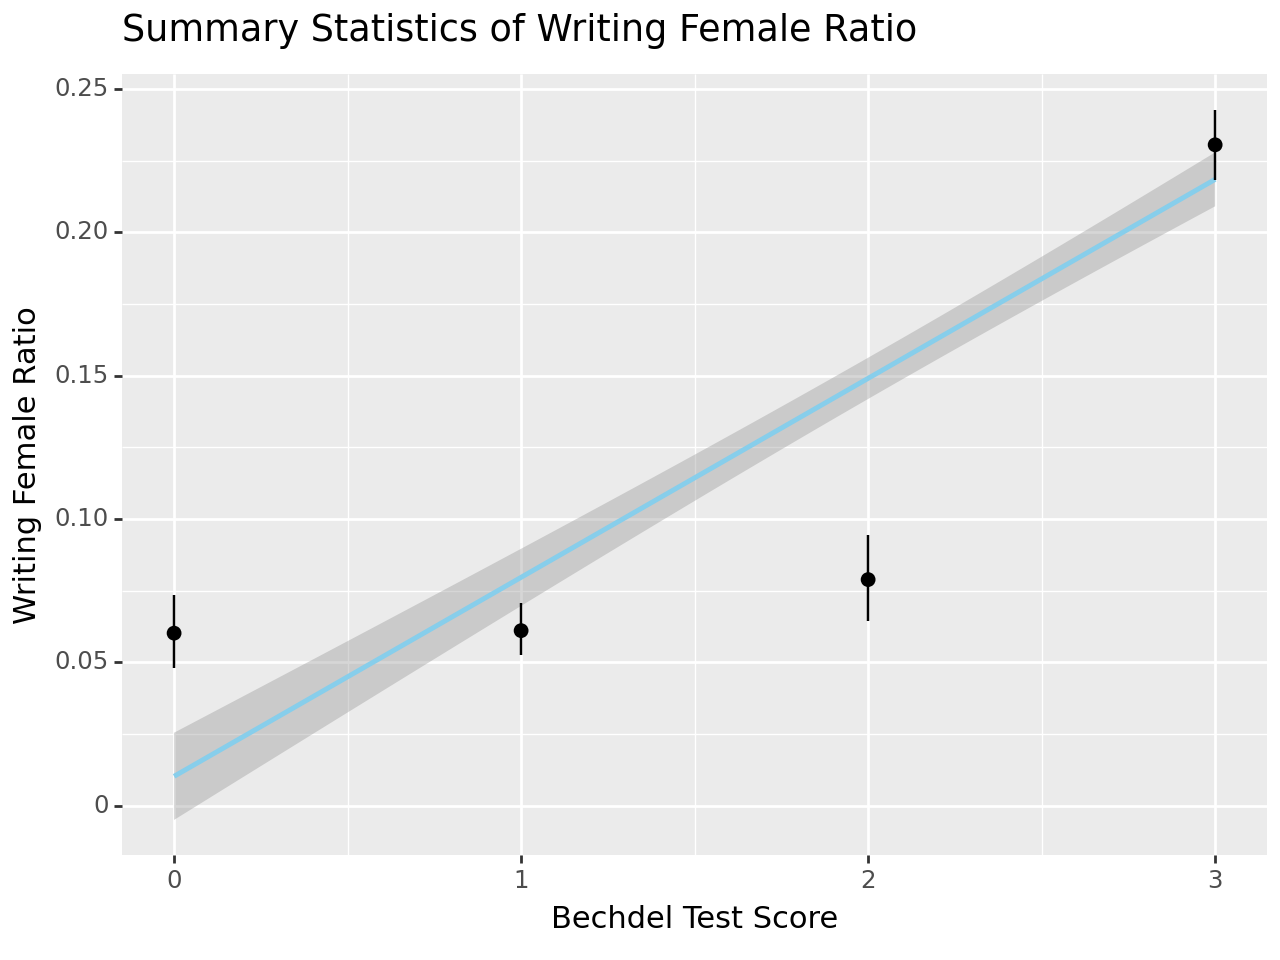

<Figure Size: (640 x 480)>

In [119]:
# Summary statistics
(
    ggplot(bechdel_df_no_nan_no_dubious, aes(x="bt_score", y="writing_female_ratio"))
    + geom_smooth(color="skyblue")
    + stat_summary()
    + labs(
        title="Summary Statistics of Writing Female Ratio",
        x="Bechdel Test Score",
        y="Writing Female Ratio",
    )
)

Grupos que não passam no teste de Bechdel nem sempre são diferentes entre si, mas todos possuem uma proporção menor de mulheres em comparação com filmes que passam no teste. A correlação positiva entre métricas relacionadas ao que acontece dentro e fora das telas é bastante evidente. Ou seja, quanto maior a porcentagem de membros femininos no elenco e na equipe, maior a probabilidade de o filme passar no teste de Bechdel, e vice-versa. Ter mais mulheres no set de filmagem pode realmente se traduzir em uma melhor representação feminina na tela.

E assim chegamos ao fim dessa análise divertida.
Conclusões

Respondemos às seguintes perguntas:

1. Como os escores do teste de Bechdel mudam ao longo do tempo? Os filmes estão se saindo melhor no teste de Bechdel?

    Sim! A média do escore de Bechdel e a porcentagem de filmes que passam no teste estão aumentando. Para os filmes que não passam no teste de Bechdel, mais estão mais próximos de passar no teste agora.

2. Como o teste de Bechdel se compara a outros indicadores de representação fora das telas?

    Existe uma correlação positiva entre o escore de Bechdel e as proporções femininas no elenco, equipe, direção e roteiro. Ter mais mulheres no local de trabalho pode resultar em uma produção mais feminista.

O trabalho quantitativo aqui se concentra mais na aquisição de dados, análise de dados e visualização, pois este projeto foi originalmente projetado para explorar a humanização na Ciência de Dados. O importante é aprender a fazer as perguntas certas, identificar vieses e limitações e estar ciente do motivo de cada decisão tomada em relação ao conjunto de dados. Não acho que faça muito sentido, por exemplo, prever o escore de Bechdel com base em proporções de gênero e envolver modelos de Aprendizado de Máquina neste projeto. Também não quero complicar demais as coisas introduzindo conceitos estatísticos como o teste HSD de Tukey para comparação em pares se a visualização já diz tudo.